**Step 1 : Import all necessary libraries and Data**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

**Step 2 : Read the Data**

In [2]:
df_xleads = pd.read_csv("Leads.csv")

In [3]:
df_xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df_xleads.shape

(9240, 37)

**Step 3: Inspecting the data and find 'null' or 'duplicate' values if any.**

In [5]:
df_xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
## checking for unique values in each column
df_xleads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
#check for data types
df_xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking for NULL or Missing values
df_xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**Step 3: Data Cleaning**

3.1 The problem statement of the case study mentions that many categorical variables have a level called 'SELECT' which needs to be handled as it provides no information and is of no help.
This happens when the visitor of the website does not select any option in the drop downs

In [9]:
# Checking for columns having 'Select' as value

select_values_col = [col for col in df_xleads.columns if len(df_xleads[col].isin(['Select']).unique())>1]
print(select_values_col)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [10]:
# Replacing 'Select' with NaN
df_xleads = df_xleads.replace('Select',np.nan)

In [11]:

select_values_col = [col for col in df_xleads.columns if len(df_xleads[col].isin(['Select']).unique())>1]
print(select_values_col)

[]


**3.2  Handling missing values**

In [12]:
#Percentage of missing values

100*(df_xleads.isna().mean()).sort_values(ascending=True)

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Magazine                                          0.000000
Search                                            0.000000
Newspaper Article                                 0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.0000

In [13]:
# Dropping the columns have 35% or more null values
df_xleads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1,inplace=True)


In [14]:
df_xleads.shape

(9240, 27)

In [15]:

100*(df_xleads.isna().mean()).sort_values(ascending=True)

Prospect ID                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.0000

**Dealing with Categorical Data**

In [16]:
# Select the columns with non-numeric data type
cat_cols = df_xleads.select_dtypes(include=['category', 'object'])
print(cat_cols)

                               Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email Do Not Call            Last Activity  \
0         Olark Chat           No          No  Page Visited on Website   

In [17]:

for column in cat_cols:
    print(cat_cols[column].astype('category').value_counts())
    print('******************************************************\n')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
******************************************************

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
******************************************************

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral

**Obervations on the Categorical data**

**What matters most to you in choosing a course**: This has 29.32 % missing values and most of the customers (  99.95% ) have selected 'better career prospects'.
Hence the value is not evenly distributed. So can be **dropped**

**What is your current occupation**: This varaible is important in X Education platform as it can be factor to decide on type of the course.But it has significant null values .These null values can imputed as 'Currently unemployed'

**Country**: Almost 96% of the customers are from India and data is not evenly distributed . Hence we can **drop** this column

**Last Activity:** This column has only 1% missing values.We can replace the null values with most occuring value which is 'Email opened'

**Lead Source:**  This column has only 0.3% missing values.We can replace the null values with most occuring value which is 'Google'

In [18]:
#From the above we can drop 'What matters most to you in choosing a course:' and 'Country' columns
df_xleads.drop(['Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [19]:
df_xleads.shape

(9240, 25)

In [20]:
# Imputing values for other columns as per the above the observation

missing_values={'Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Currently Unemployed'}
df_xleads=df_xleads.fillna(value=missing_values)

In [21]:
#Checking for the missing values again

100*(df_xleads.isna().mean()).sort_values(ascending=True)

Prospect ID                                  0.000000
I agree to pay the amount through cheque     0.000000
Get updates on DM Content                    0.000000
Update me on Supply Chain Content            0.000000
Receive More Updates About Our Courses       0.000000
Through Recommendations                      0.000000
Digital Advertisement                        0.000000
Newspaper                                    0.000000
X Education Forums                           0.000000
Newspaper Article                            0.000000
Magazine                                     0.000000
A free copy of Mastering The Interview       0.000000
Search                                       0.000000
Last Activity                                0.000000
Total Time Spent on Website                  0.000000
Converted                                    0.000000
Do Not Call                                  0.000000
Do Not Email                                 0.000000
Lead Source                 

**We can drop columns that are not useful for modeling like**
'Prospect ID',
'Lead Number',
'Last Notable Activity'

In [22]:
#Drop Prospect ID as it is not useful for analysis
df_xleads.drop(['Prospect ID'], axis=1, inplace = True)
df_xleads.drop(['Last Notable Activity'], axis=1, inplace = True)


In [23]:
df_xleads.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,5860,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,18,7,2,1,2,2,2,2,2,1,1,1,1,2
top,Landing Page Submission,Google,No,No,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
freq,4886,2904,8506,9238,3540,976,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352


**Dealing with Numerical Data**

In [24]:
# TotalVisits
df_xleads.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [25]:
#Missing values in 'TotalVisits' can be imputed with mode.
df_xleads['TotalVisits'].fillna(df_xleads['TotalVisits'].mode()[0], inplace=True)

In [26]:
df_xleads.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [27]:
#Similarly missing values in 'Page Views Per Visit' can be imputed with mode.
df_xleads['Page Views Per Visit'].fillna(df_xleads['Page Views Per Visit'].mode()[0], inplace=True)

**Dealing with columns with only one unique value**

In [28]:
#check for columns with one unique value

df_xleads.describe(include = 'object')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,5860,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,5,21,2,2,17,18,7,2,1,2,2,2,2,2,1,1,1,1,2
top,Landing Page Submission,Google,No,No,Email Opened,Finance Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No
freq,4886,2904,8506,9238,3540,976,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352


**As seen above some columns have only one unique value:**

'I agree to pay the amount through cheque',

'Get updates on DM Content',

'Update me on Supply Chain Content',

'Receive More Updates About Our Courses',

'Magazine'

**These columns can be dropped as they have only one category of response and is no use for our modelling and analysis**

In [29]:
df_xleads.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'],axis=1,inplace=True)

**Some colums might have asymmetrical and skewed data .Such destorts the model and may give wrong analysis.Hence it is advisable to remove such columns**

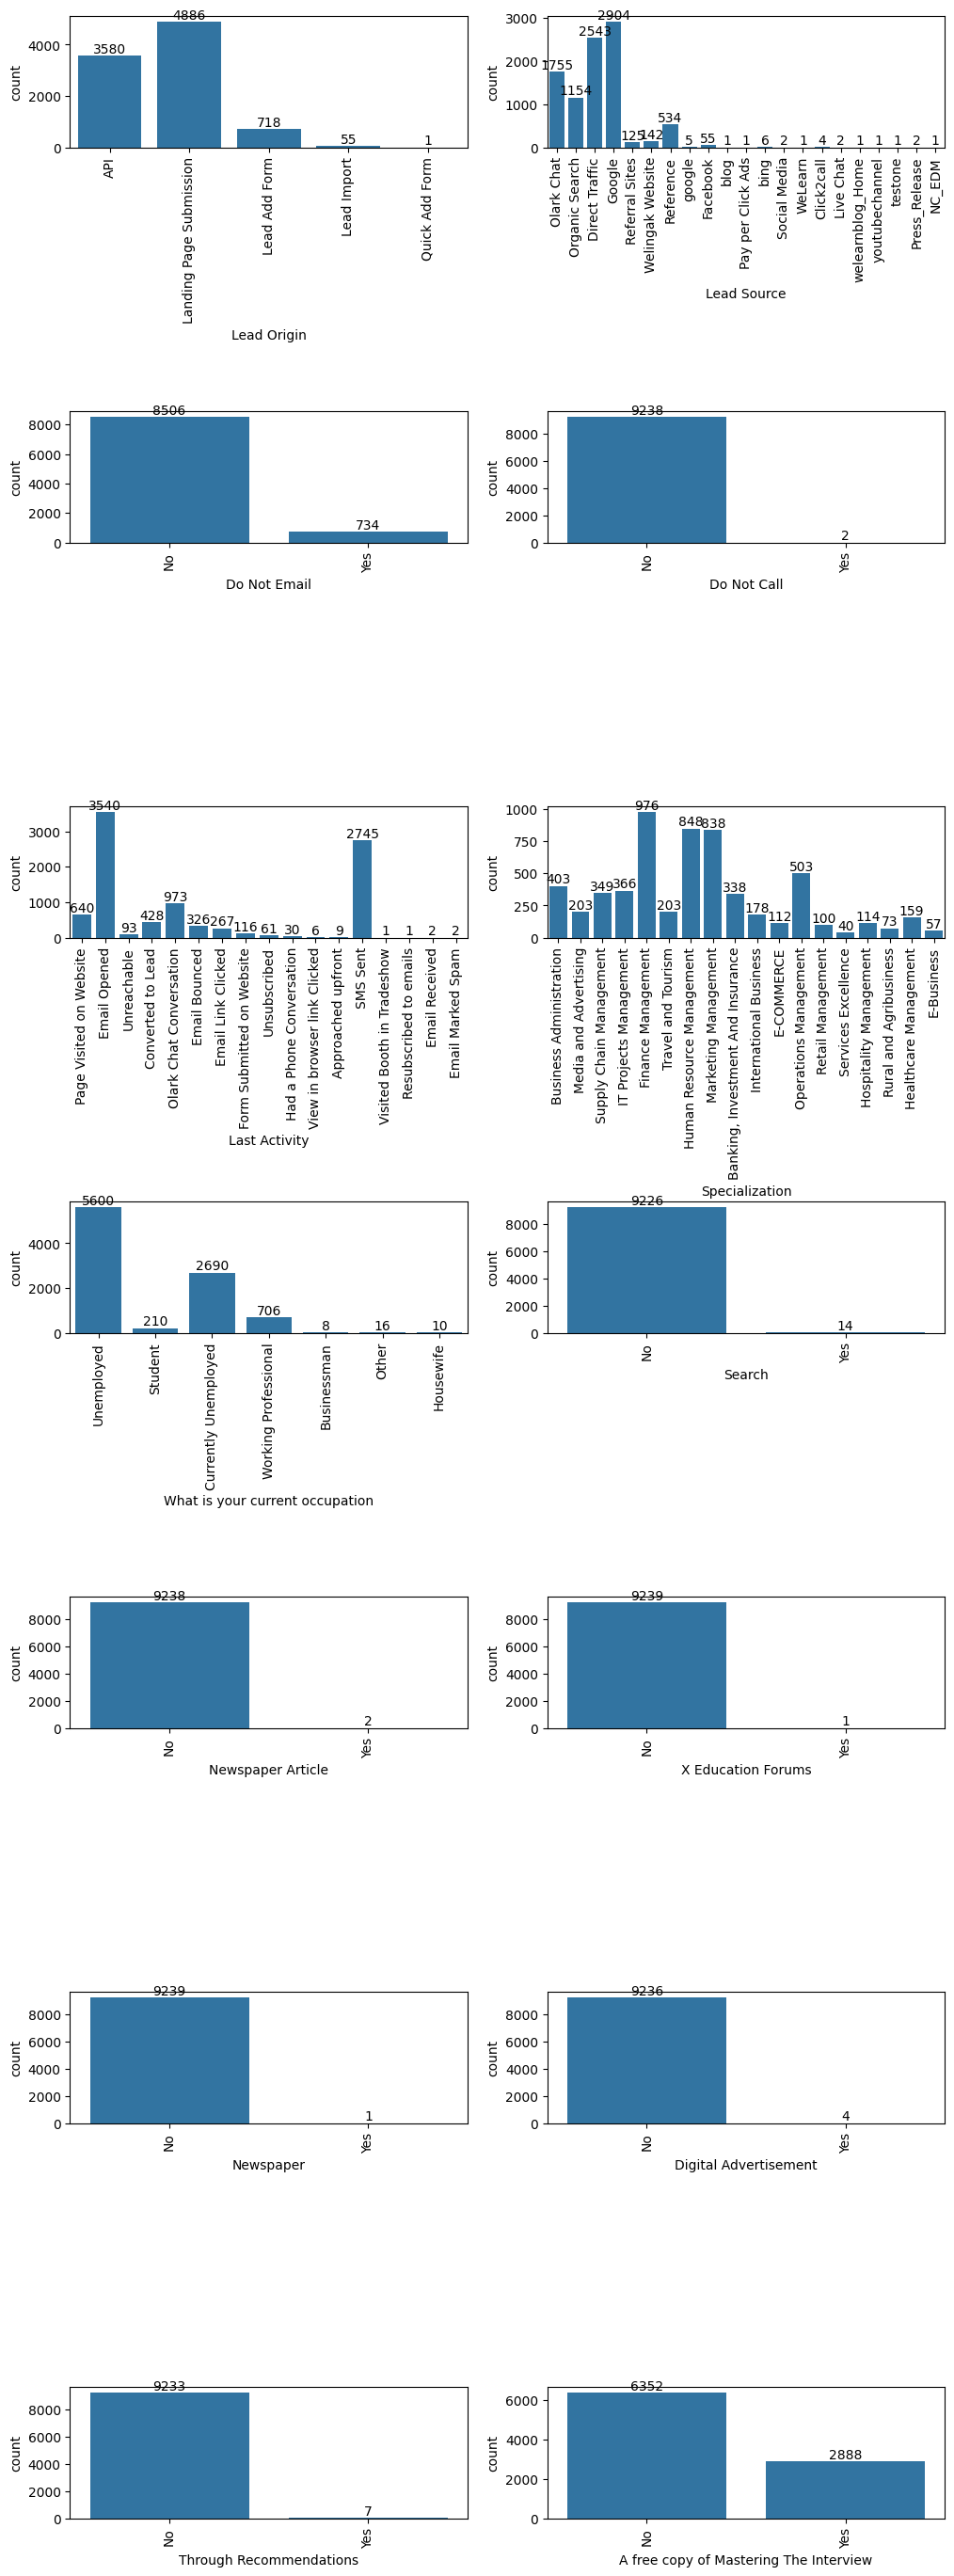

In [30]:
# plotting countplot to get data distribution
cat_cols = df_xleads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(cat_cols):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_xleads)
    plt.xticks(rotation=90)

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')



***As you can see above , some of the colums are highly skewed and not normally distributed. Such columns can be dropped .Below columns have skewed data : ***

'Do Not Call',

'Search',

'Newspaper Article',

'X Education Forums',

'Newspaper',

'Digital Advertisement',

'Through Recommendations'.

In [31]:
df_xleads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [32]:
df_xleads.shape

(9240, 11)

In [33]:
df_xleads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,NaN,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,NaN,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,NaN,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Currently Unemployed,No


In [34]:
#Grouping certain columns which have insignificant values and hence can be grouped into one column which will help to reduce the number of columns
df_xleads['Lead Source'] = df_xleads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")
df_xleads['Lead Source'] = df_xleads['Lead Source'].replace("google","Google")

df_xleads['Last Activity'] = df_xleads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation',
                                                               'Approached upfront',
                                                               'View in browser link Clicked',
                                                               'Email Marked Spam',
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

**Dealing with  Binary categorical variables by mapping them**

In [35]:
# Mapping binary categorical variables
df_xleads['Do Not Email'] = df_xleads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_xleads['A free copy of Mastering The Interview'] = df_xleads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)


In [36]:
df_xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,0


**EDA - Data Analysis**

 Check if Data is Imbalanced

Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset


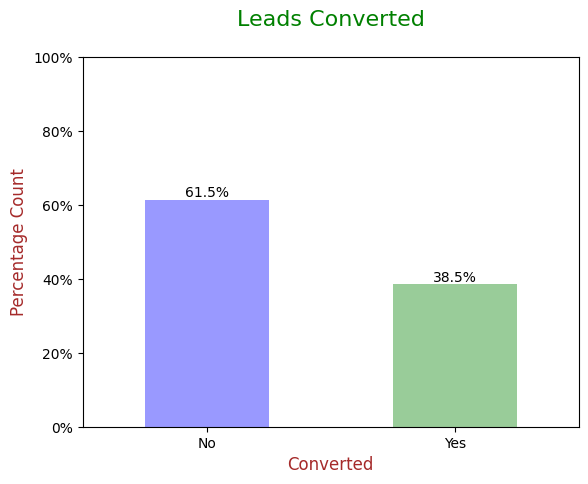

In [37]:
## ploting the results on bar plot

ax=(100*df_xleads["Converted"].value_counts(normalize=True)).plot.bar(color=["Blue","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [38]:
df_xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

In [39]:
 #Univariate Analysis for Categorical Variables
 cat_columns = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

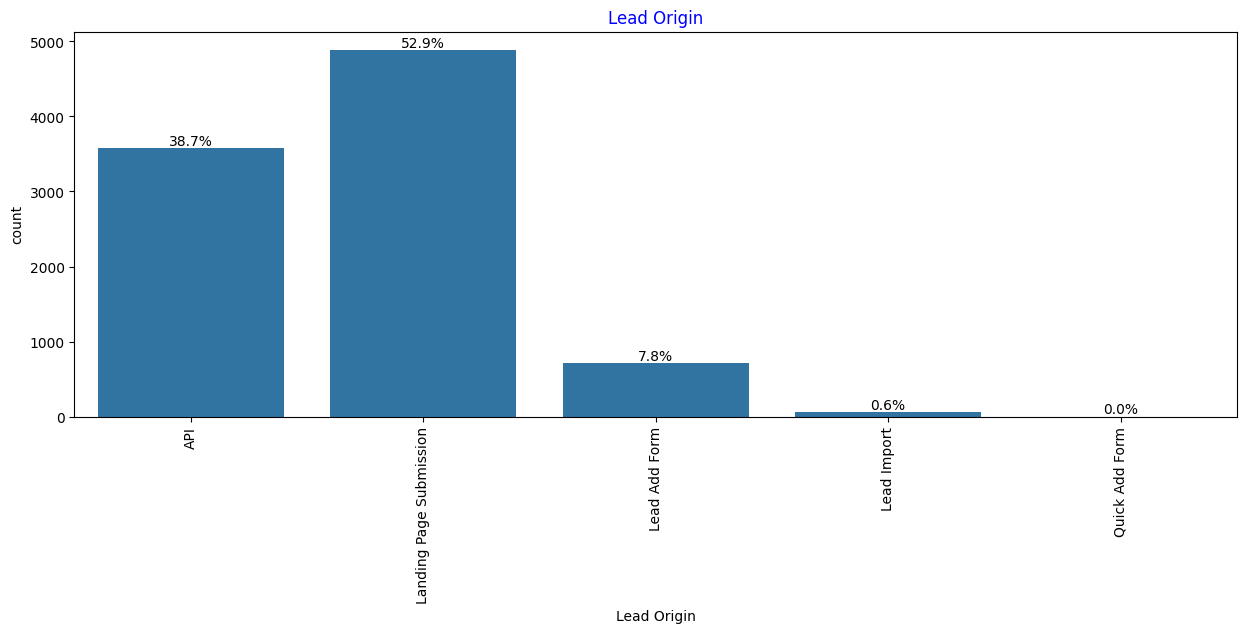

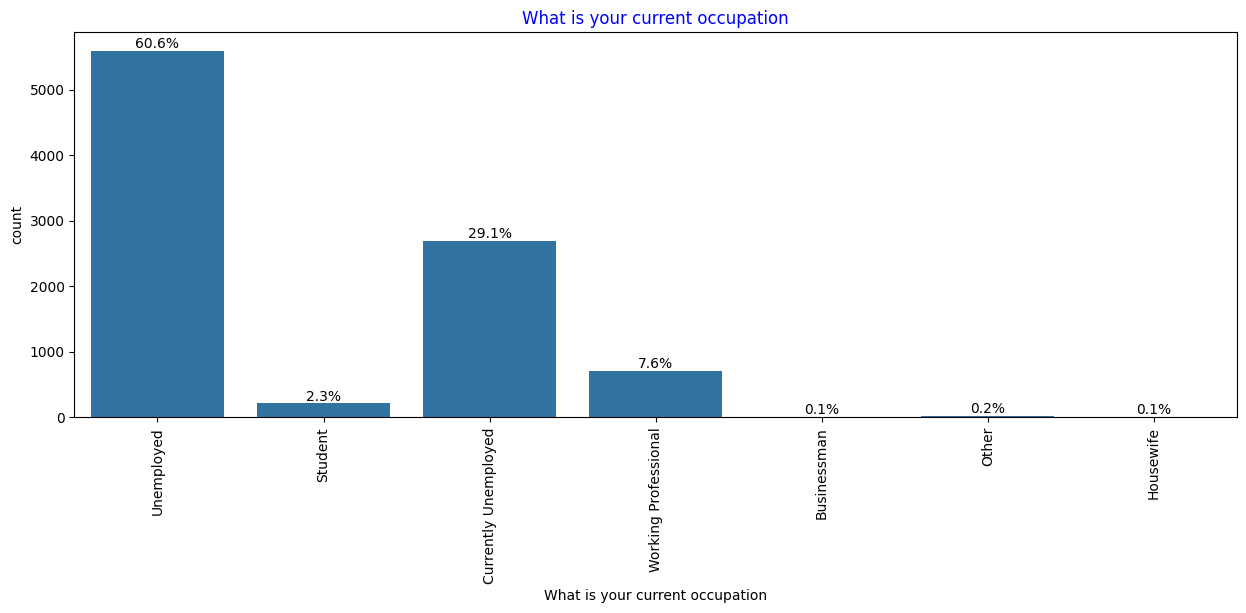

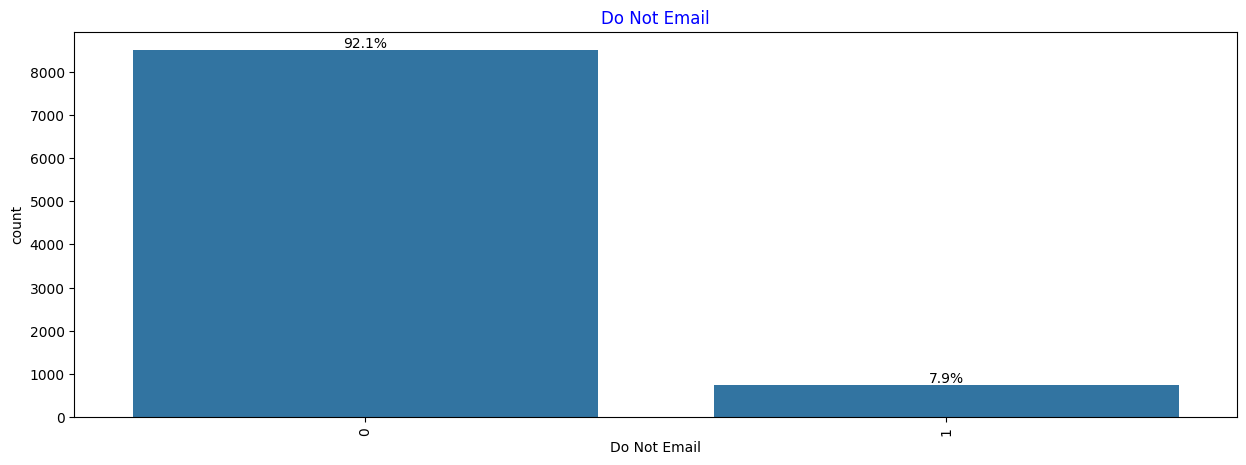

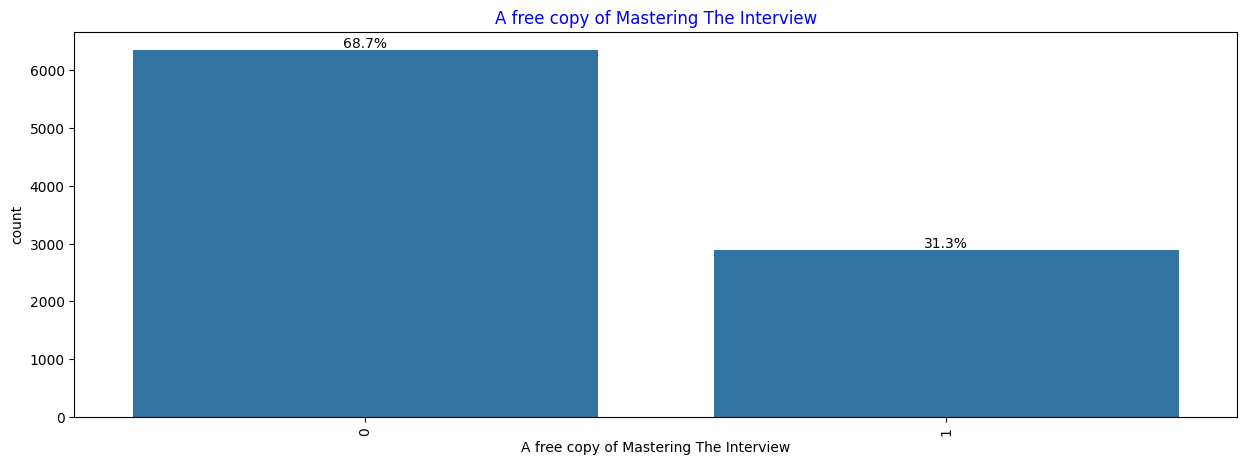

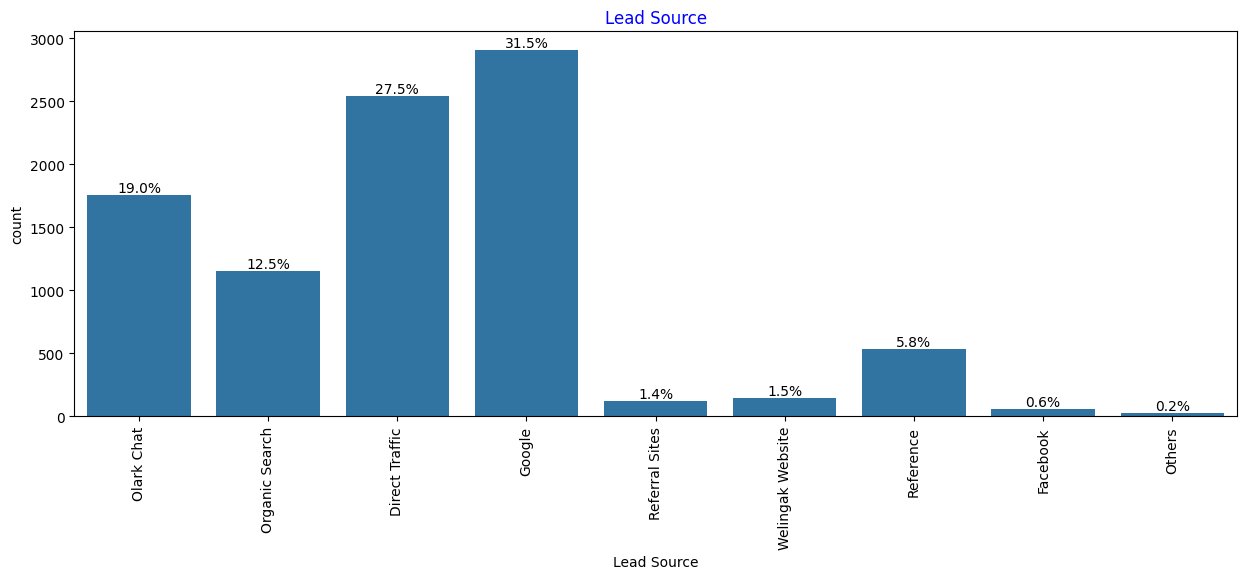

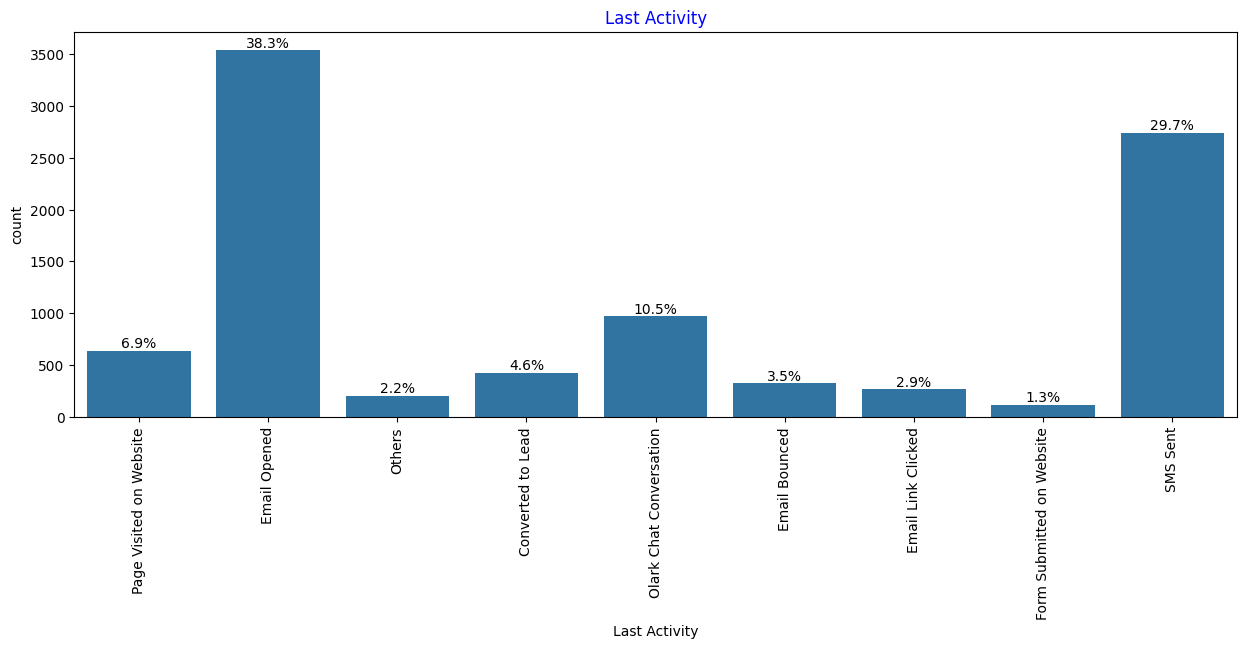

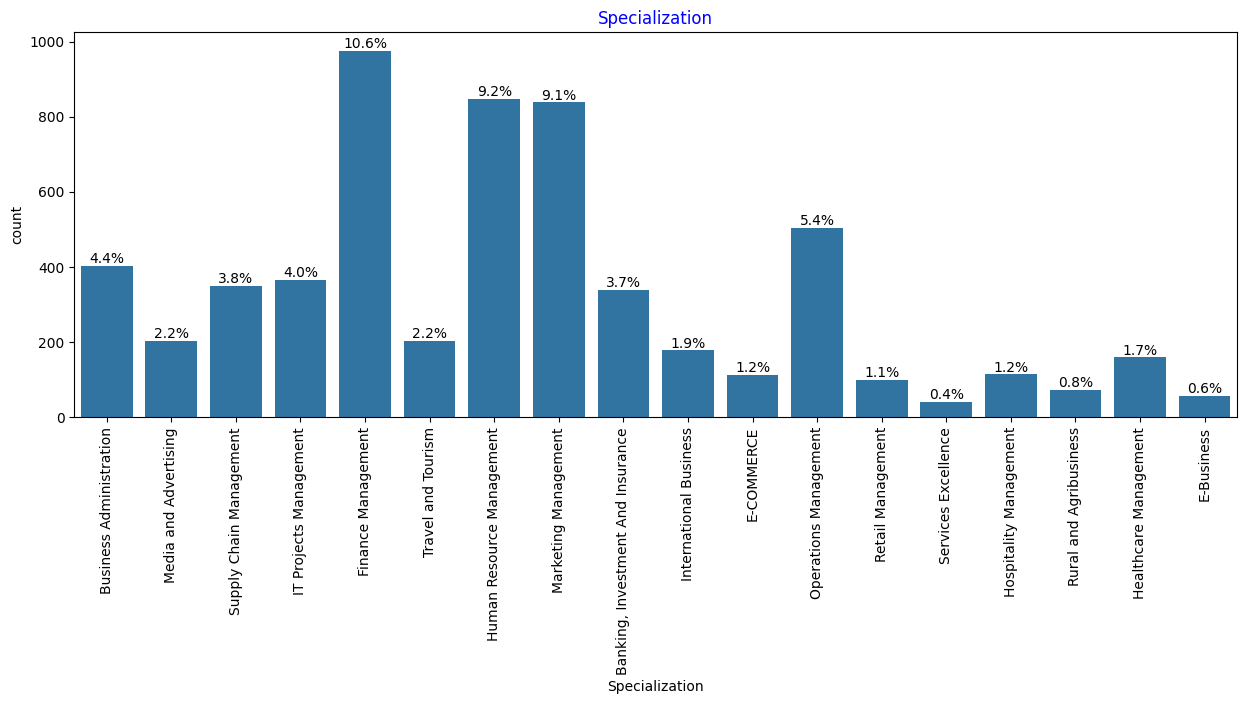

In [40]:
# countplot of cat_columns
for i in cat_columns[:7]:

    plt.figure(figsize=[15,5])
    plt.title("{}".format(i),color="blue")
    ax=sns.countplot(x=i,data=df_xleads)
    total=len(df_xleads[i])
    plt.xticks(rotation=90)

    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

Observations after Univariate Analysis

1. Lead Origin:52.9% of users are identified from '**Landing Page Submission**' and 38.7 % of users are identified from '**API**'

2. Current_occupation: It showed 90% of the customers as Unemployed (60% **Unemployed** and 29% **Currently Employed**)

3. Do Not Email: 92% of the people have opted out via email

4. Lead Source: 31.5% people's Lead source is from **Google** & 27.5% from **Direct Traffic** combined

5.Last Activity: 38% of customers's Last Activity is Email Opened activities and 29.7% customer's last activiyt is 'SENT SMS'Z

6.Specialization :Marketing Managemt,HR Management,Finance Management were the main Specialisations observed

In [41]:
num_columns =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

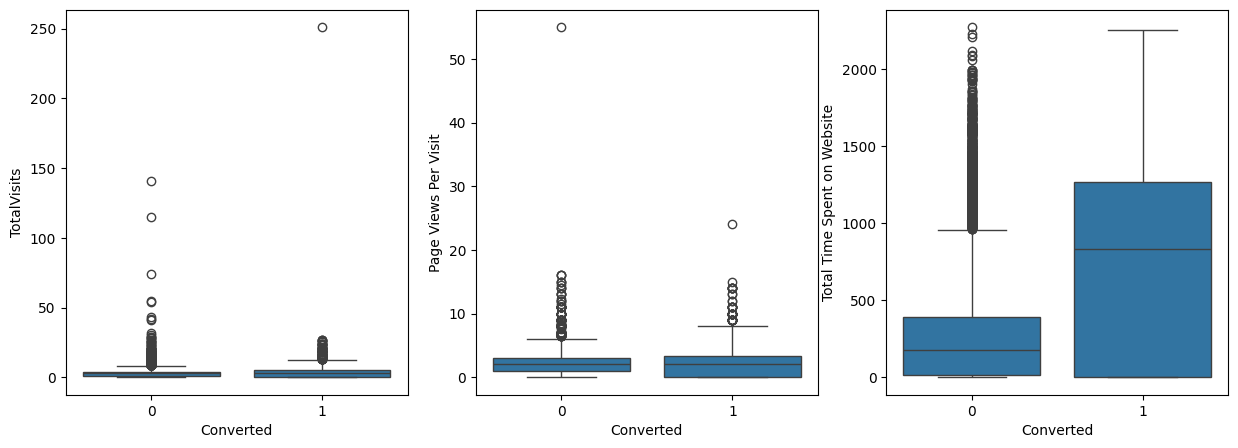

In [42]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_xleads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_xleads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_xleads)
plt.show()

Observations:

People who have spent time on website are succesfully converted than who are not

**Data Preparation for building models**

In [43]:
# Dummy variable for some of the categorical variables
dummy = pd.get_dummies(df_xleads[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"]], dtype=int, drop_first=True)

# Adding the results to the master dataframe
df_xleads = pd.concat([df_xleads, dummy], axis=1)

In [44]:
df_xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Currently Unemployed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,NaN,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [45]:
df_xleads=df_xleads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation"],axis=1)

In [46]:
df_xleads.shape

(9240, 49)

In [47]:
df_xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   int64  
 7   Lead Origin_Lead Add Form                             9240 non-null   int64  
 8   Lead Origin_Lead Import                               9240

**Splitting the data into Training/Testing**

In [48]:
# Putting predictor variables to X
X = df_xleads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_xleads["Converted"]

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [51]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


In [52]:
 #Feature Scaling

 # using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [53]:
#After scaling

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Currently Unemployed,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,-1.057954,-0.293817,-0.071611,-0.012435,-0.071611,...,-0.085555,-0.069397,-0.197576,-0.147651,-0.64325,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
6795,-0.291638,0.109111,0.005716,-0.452487,1.485511,0.945221,-0.293817,-0.071611,-0.012435,-0.071611,...,-0.085555,-0.069397,-0.197576,-0.147651,-0.64325,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
3516,-0.291638,0.297808,-0.691418,0.083827,-0.673169,-1.057954,-0.293817,-0.071611,-0.012435,-0.071611,...,-0.085555,-0.069397,-0.197576,-0.147651,-0.64325,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
8105,-0.291638,0.297808,1.365219,1.229797,-0.673169,0.945221,-0.293817,-0.071611,-0.012435,-0.071611,...,-0.085555,14.409898,-0.197576,-0.147651,-0.64325,-0.037328,-0.035191,-0.146554,0.807793,-0.290075
3934,-0.291638,-0.645678,-0.885371,-1.062143,-0.673169,-1.057954,-0.293817,-0.071611,-0.012435,-0.071611,...,-0.085555,-0.069397,-0.197576,-0.147651,-0.64325,-0.037328,-0.035191,-0.146554,0.807793,-0.290075


In [54]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_xleads['Converted'])/len(df_xleads['Converted'].index))*100
LCR

38.53896103896104

**As seen above there is 38.53 % conversion rate**

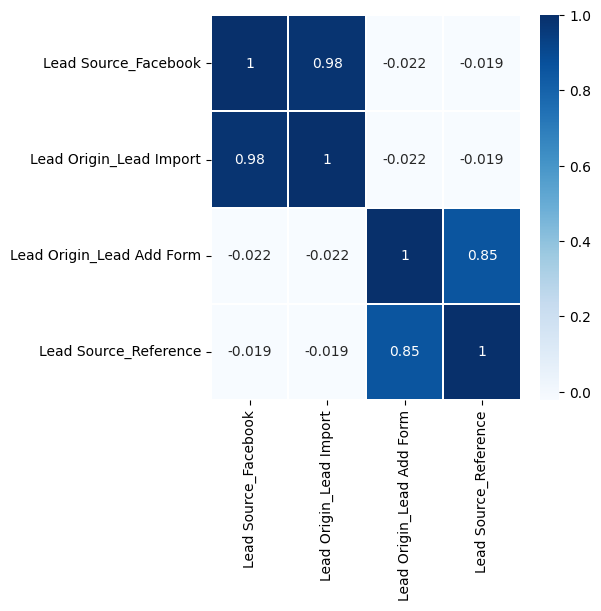

In [55]:
#Looking at Correlations

plt.figure(figsize = (5,5))
sns.heatmap(df_xleads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

**As seen above these predictor variables above are very highly correlated with each other near diagonal with (0.98 and 0.85), it is better that we drop one of these variables from each pair.**

In [56]:
#Dropping one from each pair
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   int64  
 6   Lead Origin_Quick Add Form                            2772 non-null   int64  
 7   Lead Source_Facebook                                  2772 non-null   int64  
 8   Lead Source_Google                                    2772 n

**Model Building**

We will Build Logistic Regression Model for predicting categorical variable

Feature Selection Using RFE (Coarse tuning)

Fine-tuning using p-values and VIFs

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6468 non-null   float64
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   float64
 3   Page Views Per Visit                                  6468 non-null   float64
 4   A free copy of Mastering The Interview                6468 non-null   float64
 5   Lead Origin_Landing Page Submission                   6468 non-null   float64
 6   Lead Origin_Quick Add Form                            6468 non-null   float64
 7   Lead Source_Facebook                                  6468 non-null   float64
 8   Lead Source_Google                                    6468 n

In [59]:
 #Feature Selection Using RFE (Recursive Feature Elimination)
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [60]:
# Check the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,Do Not Email,True,1
41,What is your current occupation_Housewife,True,1
40,What is your current occupation_Currently Unem...,True,1
20,Last Activity_Others,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
9,Lead Source_Olark Chat,True,1
22,Last Activity_SMS Sent,True,1
45,What is your current occupation_Working Profes...,True,1


In [61]:
rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'What is your current occupation_Currently Unemployed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [62]:
#Function to calculate VIFs for variables
def cal_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

**Building Model 1**

In [63]:
# Building model using statsmodels, for the detailed statistics

rfe_columns=X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_columns]
X_train_sm1 = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()
logm1.params

const                                                  -0.618514
Do Not Email                                           -0.275486
TotalVisits                                             0.234587
Total Time Spent on Website                             1.065961
Page Views Per Visit                                   -0.144149
Lead Origin_Landing Page Submission                    -0.150071
Lead Source_Google                                      0.139005
Lead Source_Olark Chat                                  0.432059
Lead Source_Reference                                   0.769710
Lead Source_Welingak Website                            0.612240
Last Activity_Email Opened                              0.472993
Last Activity_Others                                    0.224862
Last Activity_SMS Sent                                  0.968518
What is your current occupation_Currently Unemployed   -0.546898
What is your current occupation_Housewife               0.852881
What is your current occu

In [64]:
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.6
Date:                Sun, 02 Jun 2024   Deviance:                       5291.2
Time:                        12:00:15   Pearson chi2:                 7.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6185     19.168     -0.032      0.974     -38.187      36.950
Do Not Email                                            -0.2755      0.046     -5.957      0.000      -0.366      -0.185
TotalVisits                                              0.2346      0.050      4.718      0.000       0.137       0.332
Total Time Spent on Website                              1.0660      0.040     26.893      0.000       0.988       1.144
Page Views Per Visit                                    -0.1441      0.051     -2.803      0.005      -0.245      -0.043
Lead Origin_Landing Page Submission                     -0.1501      0.046     -3.264      0.001      -0.240      -0.060
Lead Source_Google                                       0.1390      0.038      3.667      0.000       0.065       0.213
Lead Source_Olark Chat                                   0.4321      0.053      8.081      0.000       0.327       0.537
Lead Source_Reference                                    0.7697      0.053     14.482      0.000       0.666       0.874
Lead Source_Welingak Website                             0.6122      0.087      7.066      0.000       0.442       0.782
Last Activity_Email Opened                               0.4730      0.047     10.030      0.000       0.381       0.565
Last Activity_Others                                     0.2249      0.035      6.457      0.000       0.157       0.293
Last Activity_SMS Sent                                   0.9685      0.046     20.993      0.000       0.878       1.059
What is your current occupation_Currently Unemployed    -0.5469      0.039    -13.921      0.000      -0.624      -0.470
What is your current occupation_Housewife                0.8529    513.496      0.002      0.999   -1005.581    1007.287
What is your current occupation_Working Professional     0.6848      0.050     13.647      0.000       0.586       0.783
========================================================================================================================
"""

As seen above 'What is your current occupation_Housewife' has high p-value which is way above the expected ratio : 0.999 which is way below accepted value of 0.05

In [65]:
# Dropping 'What is your current occupation_Housewife' column
rfe_columns=rfe_columns.drop("What is your current occupation_Housewife")

**MODEL 2**

In [66]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_columns]

# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logm2.params

const                                                  -0.645066
Do Not Email                                           -0.276596
TotalVisits                                             0.232620
Total Time Spent on Website                             1.064861
Page Views Per Visit                                   -0.145707
Lead Origin_Landing Page Submission                    -0.145315
Lead Source_Google                                      0.140258
Lead Source_Olark Chat                                  0.431043
Lead Source_Reference                                   0.776241
Lead Source_Welingak Website                            0.611864
Last Activity_Email Opened                              0.472136
Last Activity_Others                                    0.223609
Last Activity_SMS Sent                                  0.964045
What is your current occupation_Currently Unemployed   -0.548766
What is your current occupation_Working Professional    0.682507
dtype: float64

In [67]:

logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.6
Date:                Sun, 02 Jun 2024   Deviance:                       5305.2
Time:                        12:00:15   Pearson chi2:                 7.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6451      0.039    -16.431      0.000      -0.722      -0.568
Do Not Email                                            -0.2766      0.046     -5.983      0.000      -0.367      -0.186
TotalVisits                                              0.2326      0.049      4.702      0.000       0.136       0.330
Total Time Spent on Website                              1.0649      0.040     26.897      0.000       0.987       1.142
Page Views Per Visit                                    -0.1457      0.051     -2.835      0.005      -0.246      -0.045
Lead Origin_Landing Page Submission                     -0.1453      0.046     -3.165      0.002      -0.235      -0.055
Lead Source_Google                                       0.1403      0.038      3.706      0.000       0.066       0.214
Lead Source_Olark Chat                                   0.4310      0.053      8.071      0.000       0.326       0.536
Lead Source_Reference                                    0.7762      0.053     14.625      0.000       0.672       0.880
Lead Source_Welingak Website                             0.6119      0.087      7.062      0.000       0.442       0.782
Last Activity_Email Opened                               0.4721      0.047     10.041      0.000       0.380       0.564
Last Activity_Others                                     0.2236      0.035      6.422      0.000       0.155       0.292
Last Activity_SMS Sent                                   0.9640      0.046     20.945      0.000       0.874       1.054
What is your current occupation_Currently Unemployed    -0.5488      0.039    -13.979      0.000      -0.626      -0.472
What is your current occupation_Working Professional     0.6825      0.050     13.606      0.000       0.584       0.781
========================================================================================================================
"""

**Model 2 is stable and it has significant p-values with (p-values < 0.05), so we will use it for further analysis.**

**Model Evaluation**

In [68]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_sm2)

y_train_pred[:10]

1871    0.324478
6795    0.252162
3516    0.383614
8105    0.830708
3934    0.324478
4844    0.989308
3297    0.131972
8071    0.994740
987     0.079822
7423    0.935628
dtype: float64

In [69]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32447823, 0.25216234, 0.38361417, 0.83070765, 0.32447823,
       0.98930756, 0.13197236, 0.99474041, 0.07982182, 0.93562829])

In [70]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.324478,1871
1,0,0.252162,6795
2,0,0.383614,3516
3,0,0.830708,8105
4,0,0.324478,3934


In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.324478,1871,0
1,0,0.252162,6795,0
2,0,0.383614,3516,0
3,0,0.830708,8105,1
4,0,0.324478,3934,0


In [72]:
#Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3571  431]
 [ 760 1706]]


In [73]:
#Accuracy
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8158627087198516


Sensitivity and Specificity
When we have Predicted at threshold 0.5 probability **bold text**

In [74]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6918085969180859


In [76]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.892303848075962


In [77]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10769615192403797


In [78]:
# positive predictive value
print (TP / float(TP+FP))


0.798315395414132


In [79]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8245208958670053


**Plotting the ROC Curve**

In [80]:
#   Function to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

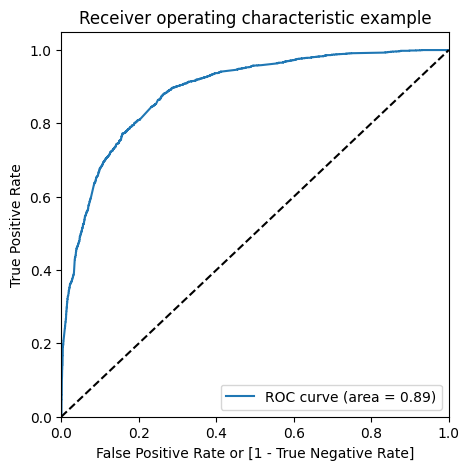

In [82]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

**Observation : Area under ROC curve is 0.89 out of 1 which indicates a good predictive model**

**Finding Optimal Cutoff Point/ Probability**

In [83]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.324478,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.252162,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.383614,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.830708,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.324478,3934,0,1,1,1,1,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.611936  0.976075  0.387556
0.2   0.2  0.757730  0.915653  0.660420
0.3   0.3  0.791435  0.867397  0.744628
0.4   0.4  0.814162  0.764396  0.844828
0.5   0.5  0.815863  0.691809  0.892304
0.6   0.6  0.799011  0.595702  0.924288
0.7   0.7  0.781694  0.517032  0.944778
0.8   0.8  0.761596  0.431873  0.964768
0.9   0.9  0.716914  0.277372  0.987756


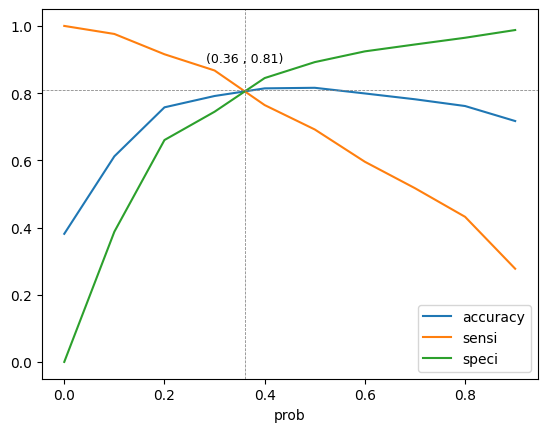

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


**Observation** : 0.36 is the approx. point where all the curves meet, so 0.36 is our Optimal cutoff point for probability threshold

In [86]:
#mapping again using optimal cutoff point
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.324478,1871,0
1,0,0.252162,6795,0
2,0,0.383614,3516,1
3,0,0.830708,8105,1
4,0,0.324478,3934,0


**Calculating all metrics using confusion matrix for Train**

In [87]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8089053803339518


In [88]:
#Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))


In [89]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3283  719]
 [ 517 1949]] 

************************************************** 

True Negative                    :  3283
True Positive                    :  1949
False Negative                   :  517
False Positve                    :  719
Model Accuracy                   :  0.8089
Model Sensitivity                :  0.7903
Model Specificity                :  0.8203
Model Precision                  :  0.7305
Model Recall                     :  0.7903
Model True Positive Rate (TPR)   :  0.7903
Model False Positive Rate (FPR)  :  0.1797


************************************************** 



 **Precision and recall tradeoff**

Comparing all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80%

In [90]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

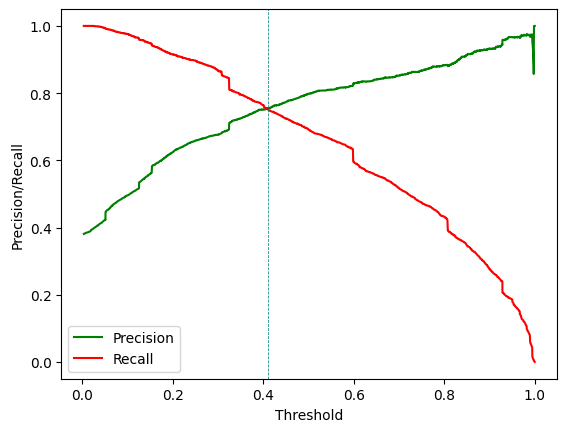

In [91]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

**our probability threshold is 0.41 aprrox from above curve**

In [92]:

# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [93]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.324478,1871,0,0
1,0,0.252162,6795,0,0
2,0,0.383614,3516,1,0
3,0,0.830708,8105,1,1
4,0,0.324478,3934,0,0


In [94]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3403  599]
 [ 612 1854]] 

************************************************** 

True Negative                    :  3403
True Positive                    :  1854
False Negative                   :  612
False Positve                    :  599
Model Accuracy                   :  0.8128
Model Sensitivity                :  0.7518
Model Specificity                :  0.8503
Model Precision                  :  0.7558
Model Recall                     :  0.7518
Model True Positive Rate (TPR)   :  0.7518
Model False Positive Rate (FPR)  :  0.1497


************************************************** 



**Adding Lead Score Feature to Training dataframe**

A higher score would mean that the lead is hot, i.e. is most likely to convert
Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [95]:

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.324478,1871,0,32
1,0,0.252162,6795,0,25
2,0,0.383614,3516,1,38
3,0,0.830708,8105,1,83
4,0,0.324478,3934,0,32


**Making Predictions on test set**

In [96]:
# Scaling Test dataset
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          2772 non-null   int64  
 1   TotalVisits                                           2772 non-null   float64
 2   Total Time Spent on Website                           2772 non-null   int64  
 3   Page Views Per Visit                                  2772 non-null   float64
 4   A free copy of Mastering The Interview                2772 non-null   int64  
 5   Lead Origin_Landing Page Submission                   2772 non-null   int64  
 6   Lead Origin_Quick Add Form                            2772 non-null   int64  
 7   Lead Source_Facebook                                  2772 non-null   int64  
 8   Lead Source_Google                                    2772 n

In [97]:
# fetching numerical colums
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test = X_test[rfe_columns]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Currently Unemployed,What is your current occupation_Working Professional
4269,-0.298654,1.324501,0.933036,2.660405,-1.062559,-0.656003,-0.483368,-0.234082,-0.136905,-0.795304,-0.162131,1.567278,1.574180,-0.28185
2376,-0.298654,-0.944318,-0.900812,-1.108316,-1.062559,-0.656003,-0.483368,4.272002,-0.136905,-0.795304,-0.162131,1.567278,-0.635251,-0.28185
7766,-0.298654,0.473694,-0.793792,1.247135,-1.062559,1.524382,-0.483368,-0.234082,-0.136905,-0.795304,6.167840,-0.638049,-0.635251,3.54799
9199,-0.298654,-0.944318,-0.900812,-1.108316,-1.062559,-0.656003,2.068816,-0.234082,-0.136905,-0.795304,-0.162131,-0.638049,-0.635251,-0.28185
4359,-0.298654,-0.944318,-0.900812,-1.108316,-1.062559,-0.656003,-0.483368,4.272002,-0.136905,1.257380,-0.162131,-0.638049,-0.635251,-0.28185


**Prediction on Test Dataset using final model**

In [98]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [99]:
# making prediction using model 2 (final model)
y_test_pred = logm2.predict(X_test_sm)

In [100]:
# top 10 columns
y_test_pred[:10]

4269    0.495773
2376    0.940583
7766    0.828331
9199    0.146563
4359    0.832721
9186    0.609416
1631    0.516291
8963    0.274015
8007    0.032193
5324    0.396470
dtype: float64

In [101]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.495773
2376,0.940583
7766,0.828331
9199,0.146563
4359,0.832721


In [102]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [103]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.495773
1,1,2376,0.940583
2,1,7766,0.828331
3,0,9199,0.146563
4,1,4359,0.832721


In [104]:
#renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted Probablity'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted Probablity'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted Probablity
0,4269,1,0.495773
1,2376,1,0.940583
2,7766,1,0.828331
3,9199,0,0.146563
4,4359,1,0.832721


In [105]:
# taking sensitivity-specificity method at 0.36 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted Probablity'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted Probablity,final_predicted
0,4269,1,0.495773,1
1,2376,1,0.940583,1
2,7766,1,0.828331,1
3,9199,0,0.146563,0
4,4359,1,0.832721,1


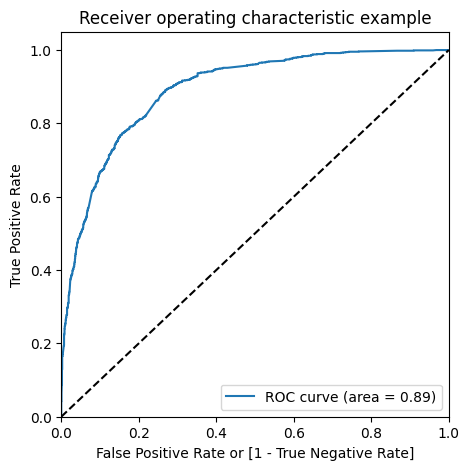

In [106]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted Probablity"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted Probablity"])

**Area under ROC curve is 0.87 out of 1 which indicates a good predictive model**

In [107]:
#Test set Model Evaluation
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1358  319]
 [ 219  876]] 

************************************************** 

True Negative                    :  1358
True Positive                    :  876
False Negative                   :  219
False Positve                    :  319
Model Accuracy                   :  0.8059
Model Sensitivity                :  0.8
Model Specificity                :  0.8098
Model Precision                  :  0.7331
Model Recall                     :  0.8
Model True Positive Rate (TPR)   :  0.8
Model False Positive Rate (FPR)  :  0.1902


************************************************** 




Observation: The evaluation metrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

For Test set
Accuracy : 80.34%
Sensitivity : 79.82% ≈ 80%
Specificity : 80.68%
These matrics are very close to train set, so out final model logm2 is performing with good consistency on both Train & Test set

In [108]:
# features and their coefficicent from final model
parameters=logm2.params.sort_values(ascending=False)
parameters

Total Time Spent on Website                             1.064861
Last Activity_SMS Sent                                  0.964045
Lead Source_Reference                                   0.776241
What is your current occupation_Working Professional    0.682507
Lead Source_Welingak Website                            0.611864
Last Activity_Email Opened                              0.472136
Lead Source_Olark Chat                                  0.431043
TotalVisits                                             0.232620
Last Activity_Others                                    0.223609
Lead Source_Google                                      0.140258
Lead Origin_Landing Page Submission                    -0.145315
Page Views Per Visit                                   -0.145707
Do Not Email                                           -0.276596
What is your current occupation_Currently Unemployed   -0.548766
const                                                  -0.645066
dtype: float64

**Adding Lead Score Feature to Test dataframe**

In [109]:
# add Lead Score

y_pred_final['Lead_Score'] = y_pred_final['Converted Probablity'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted Probablity,final_predicted,Lead_Score
0,4269,1,0.495773,1,50
1,2376,1,0.940583,1,94
2,7766,1,0.828331,1,83
3,9199,0,0.146563,0,15
4,4359,1,0.832721,1,83


**Lead Score:** Lead Score is assigned to the customers

The customers with a higher lead score have a higher conversion chance
The customers with a lower lead score have a lower conversion chance.

**Conclusion**

**Train Data Set:**
Accuracy: 80.46%

Sensitivity: 80.05%

Specificity: 80.71%

**Test Data Set:**
Accuracy: 80.34%

Sensitivity: 79.82% ≈ 80%

Specificity: 80.68%

NOTE: The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

The model achieved a sensitivity of 80.05% in the train set and 79.82% in the test set, using a cut-off value of 0.36.



**Top 3 features that contributing positively to predicting hot leads in the model are:**

Lead Source_Welingak Website

Lead Source_Reference

Current_occupation_Working Professional